<a href="https://colab.research.google.com/github/Sino-taku/PyTorch_Reference-/blob/main/First_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 新しいセクション

#初めての機械学習

勾配計算機能を利用して「線形回帰」と呼ばれる単純な機械学習を解いてみます。

#問題の定義

身長から体重を予測する機械学習モデルを作ろう

(166,58.7) (176,75.7) (171,62.1) (173,70.4) (169,60.1)

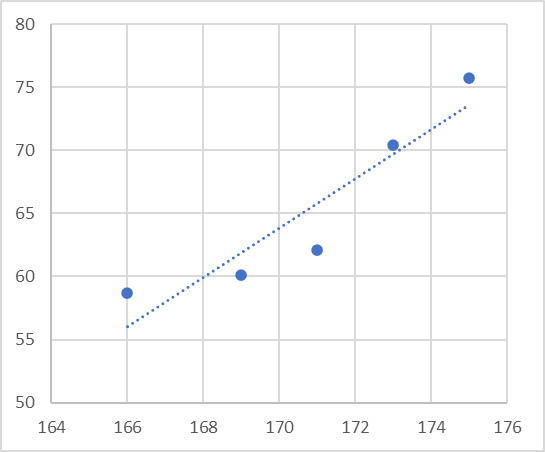

上記の散布図のように近似した一次関数を求めるというのが線形回帰の最も単純な形の機械学習モデルです。

#勾配降下法

この方法は4つの重要な「予測計算」「損失計算」
「勾配計算」「パラメータ修正」を繰り返しながら予測関数の中のパラメータを最適な値に近づけることです。
その中で「最適化関数」が重要になるので追って説明します。

(1)予測計算

入力テンソルｘ　出力テンソル（予測結果）をYpとすると今回の例題では

Yp=W*X+B

パラメータとしてＷとＢを持つ

(2)損失計算

教師あり学習においては正階テンソルＹと出力テンソルの差を小さくします。

今回は全てのデータの差を二乗してその平均をとった「平均二乗誤差」を使用します

(3)勾配計算

予測関数を構成するＷとＢを少し変えその時の損失の変化の度合いを調べます。

(4)パラメータ修正
勾配値に小さな定数（学習率）lrをかけ、その値の分だけＷとＢを同時に減らします。

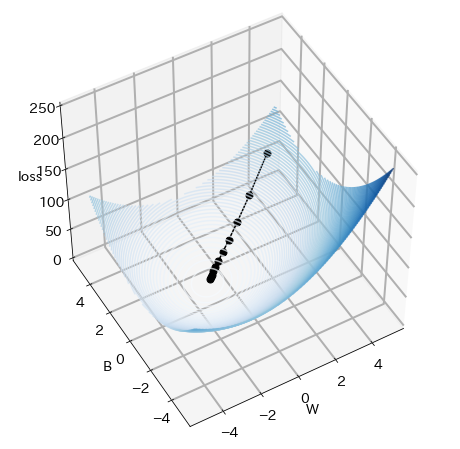

上記のグラフは損失とWとBの関係を示したものです。
損失なのでグラフが山なりではなくすり鉢状になりますが、すり鉢の底に向かって変化しています。




In [ ]:
# 必要ライブラリの導入

!pip install japanize_matplotlib | tail -n 1
!pip install torchviz | tail -n 1

# 必要ライブラリのインポート

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from IPython.display import display

# PyTorch関連ライブラリ
import torch
from torchviz import make_dot




## 3.5 データ前処理
5人の人の身長と体重のデータを使う。  
1次関数で身長から体重を予測する場合、最適な直線を求めることが目的

[[166.   58.7]
 [176.   75.7]
 [171.   62.1]
 [173.   70.4]
 [169.   60.1]]


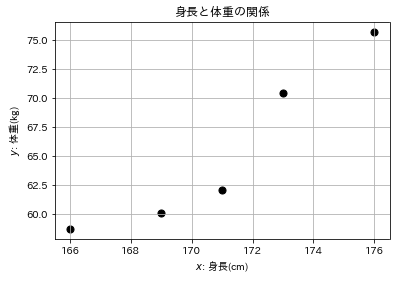

In [ ]:
# サンプルデータの宣言
sampleData1 = np.array([
    [166, 58.7],
    [176.0, 75.7],
    [171.0, 62.1],
    [173.0, 70.4],
    [169.0,60.1]])
print(sampleData1)
# 機械学習モデルで扱うため、身長だけを抜き出した変数xと
# 体重だけを抜き出した変数yをセットする

x = sampleData1[:,0]
y = sampleData1[:,1]

# 散布図表示で状況の確認

plt.scatter(x,  y,  c='k',  s=50)
plt.xlabel('$x$: 身長(cm) ')
plt.ylabel('$y$: 体重(kg)')
plt.title('身長と体重の関係')
plt.show()

### 座標系の変換
機械学習モデルでは、データは0に近い値を持つことが望ましい。  
そこで、x, y ともに平均値が0になるように平行移動し、新しい座標系をX, Yとする。

なのでそれぞれの平均値を引きます（mean関数）

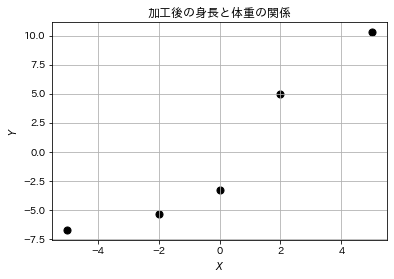

In [ ]:
X = x - x.mean()
Y = y - y.mean()

# 散布図表示で結果の確認

plt.scatter(X,  Y,  c='k',  s=50)
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.title('加工後の身長と体重の関係')
plt.show()

#(1)予測変換

まずは変換後のXとYをテンソル変数に変換します。

In [ ]:
# XとYをテンソル変数化する

X = torch.tensor(X).float()
Y = torch.tensor(Y).float()

# 結果確認

print(X)
print(Y)

tensor([-5.,  5.,  0.,  2., -2.])
tensor([-6.7000, 10.3000, -3.3000,  5.0000, -5.3000])


次に一次関数の係数に当たる変数Ｗと定数項に当たる変数Ｂもテンソル変数として定義します。

In [ ]:
# 重み変数の定義
# WとBは勾配計算をするので、requires_grad=Trueとする

W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

これで用意が整ましたので予測値Ypを計算する、そのあと可視化する

tensor([-4.,  6.,  1.,  3., -1.], grad_fn=<AddBackward0>)


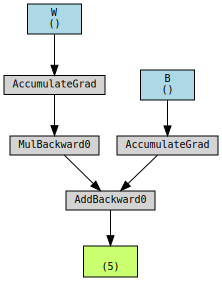

In [ ]:
# 予測関数は一次関数

def pred(X):
    return W * X + B

# 予測値の計算

Yp =  pred(X)

# 結果標示

print(Yp)

# 予測値の計算グラフ可視化

params = {'W': W, 'B': B}
g = make_dot(Yp, params=params)
display(g)

#損失計算

今回はMSE（平均に乗誤差）を使用します。

ここで「損失」とは「予測関数」と「損失関数」の合成関数であり、このため「損失」は予測関数の振る舞いを決める（WとB）の関数になっている点に注意する。



tensor(13.3520, grad_fn=<MeanBackward0>)


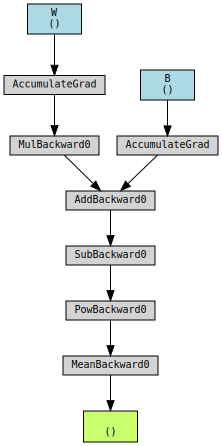

In [ ]:
# 損失関数は誤差二乗平均

def mse(Yp, Y):
    loss = ((Yp - Y) ** 2).mean()
    return loss

# 損失計算

loss = mse(Yp, Y)

# 結果標示

print(loss)

# 損失の計算グラフ可視化

params = {'W': W, 'B': B}
g = make_dot(loss, params=params)
display(g)



#(3)勾配計算

In [ ]:
# 勾配計算

loss.backward()

# 勾配値確認

print(W.grad)
print(B.grad)

tensor(-19.0400)
tensor(2.0000)


#(4)パラメータ修正

勾配計算が出来たらその値に一定の学習率（0.01や0.001）をかけた結果をもとのパラメータ値から引くのが基本

しかしそのままでは勾配計算をしている最中の変数はほかに影響が出るため変更できません。

In [ ]:
#学習率の定義

lr = 0.001

# 勾配を元にパラメータ修正
# with torch.no_grad() を付ける必要がある

with torch.no_grad():
    W -= lr * W.grad
    B -= lr * B.grad
    
    # 計算済みの勾配値をリセットする
    W.grad.zero_()
    B.grad.zero_()

# パラメータと勾配値の確認

print(W)
print(B)
print(W.grad)
print(B.grad)



tensor(1.0190, requires_grad=True)
tensor(0.9980, requires_grad=True)
tensor(0.)
tensor(0.)


元の値はどちらも1.0だったので、Wは微少量増加、Bは微少量減少したことがわかる。
この計算を繰り返すことで、最適なWとBを求めるのが勾配降下法となる。

#繰り返し計算

実際に繰り返し計算をしてみましょう。
今回は初期化のセルと繰り返しのセルを別々に説明します。

In [ ]:
# 初期化

# WとBを変数として扱う
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

# 繰り返し回数
num_epochs = 500

# 学習率
lr = 0.001

# 記録用配列初期化
history = np.zeros((0, 2))

In [ ]:
# ループ処理

for epoch in range(num_epochs):

    # 予測計算
    Yp = pred(X)
    
    # 損失計算
    loss = mse(Yp, Y)
    
    # 勾配計算
    loss.backward()
    
    with torch.no_grad():
        # パラメータ修正
        W -= lr * W.grad
        B -= lr * B.grad
        
        # 勾配値の初期化
        W.grad.zero_()
        B.grad.zero_()
        
    # 損失の記録
    if (epoch %10 == 0):
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))
        print(f'epoch = {epoch}  loss = {loss:.4f}')

epoch = 0  loss = 13.3520
epoch = 10  loss = 10.3855
epoch = 20  loss = 8.5173
epoch = 30  loss = 7.3364
epoch = 40  loss = 6.5858
epoch = 50  loss = 6.1047
epoch = 60  loss = 5.7927
epoch = 70  loss = 5.5868
epoch = 80  loss = 5.4476
epoch = 90  loss = 5.3507
epoch = 100  loss = 5.2805
epoch = 110  loss = 5.2275
epoch = 120  loss = 5.1855
epoch = 130  loss = 5.1507
epoch = 140  loss = 5.1208
epoch = 150  loss = 5.0943
epoch = 160  loss = 5.0703
epoch = 170  loss = 5.0480
epoch = 180  loss = 5.0271
epoch = 190  loss = 5.0074
epoch = 200  loss = 4.9887
epoch = 210  loss = 4.9708
epoch = 220  loss = 4.9537
epoch = 230  loss = 4.9373
epoch = 240  loss = 4.9217
epoch = 250  loss = 4.9066
epoch = 260  loss = 4.8922
epoch = 270  loss = 4.8783
epoch = 280  loss = 4.8650
epoch = 290  loss = 4.8522
epoch = 300  loss = 4.8399
epoch = 310  loss = 4.8281
epoch = 320  loss = 4.8167
epoch = 330  loss = 4.8058
epoch = 340  loss = 4.7953
epoch = 350  loss = 4.7853
epoch = 360  loss = 4.7756
epoch = 37

ほとんどは上記までに解説していますが、唯一説明していないのが一番下の「損失の記録」の部分です。これは次の結果評価で「学習曲線」と呼ばれるグラフを表示するために（今回は１０回に１回）定期的に保存する部分です。保存しているのは繰り返しの回数とその時の損失です。

#結果評価

まずはWとBの最終的な値と、損失の開始時、終了時の値を表示します。

その後損失の減り方をグラフにします。

W =  1.820683
B =  0.3675114
初期状態: 損失:13.3520
最終状態: 損失:4.6796


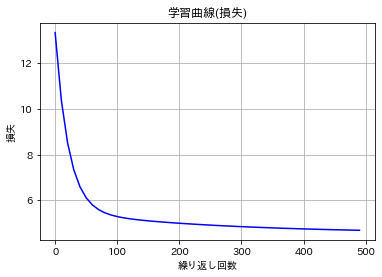

In [ ]:
# パラメータの最終値
print('W = ', W.data.numpy())
print('B = ', B.data.numpy())

#損失の確認
print(f'初期状態: 損失:{history[0,1]:.4f}') 
print(f'最終状態: 損失:{history[-1,1]:.4f}') 

# 学習曲線の表示 (損失)

plt.plot(history[:,0], history[:,1], 'b')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.show()

実際に求めた直線式を散布図に記入

tensor([-5.,  5.])
tensor([-8.7359,  9.4709])


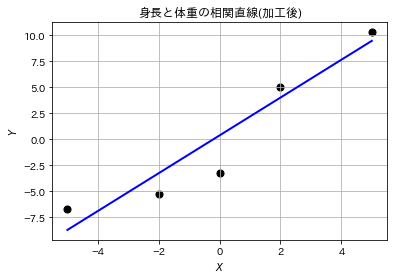

In [ ]:
# xの範囲を求める(Xrange)
X_max = X.max()
X_min = X.min()
X_range = np.array((X_min, X_max))
X_range = torch.from_numpy(X_range).float()
print(X_range)

# 対応するyの予測値を求める
Y_range = pred(X_range)
print(Y_range.data)

#グラフの描画
plt.scatter(X,  Y,  c='k',  s=50)
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.plot(X_range.data, Y_range.data, lw=2, c='b')
plt.title('身長と体重の相関直線(加工後)')
plt.show()

最後に平均値を引き算して元の数値に戻して散布図を表示します。

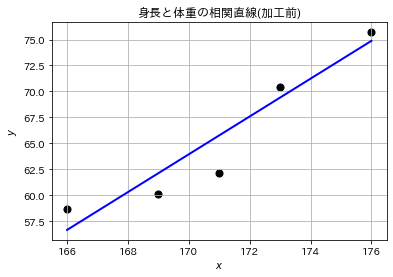

In [ ]:
# y座標値とx座標値の計算

x_range = X_range + x.mean()
yp_range = Y_range + y.mean()

# グラフ描画

plt.scatter(x,  y,  c='k',  s=50)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.plot(x_range, yp_range.data, lw=2, c='b')
plt.title('身長と体重の相関直線(加工前)')
plt.show()

#最適化関数の利用

「機械学習モデルの実装」は一通り終わったのですが、ここで一歩先に進んだモデル実装を試みます。

今回はWとBのパラメータの変更はコードで直接行っていましたが普通は「最適化関数」を使います。

In [ ]:
# 初期化

# WとBを変数として扱う
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

# 繰り返し回数
num_epochs = 500

# 学習率
lr = 0.001

# optimizerとしてSGD(確率的勾配降下法)を指定する
import torch.optim as optim
optimizer = optim.SGD([W, B], lr=lr)

# 記録用配列初期化
history = np.zeros((0, 2))

先ほどとの違いは、SGDというクラスのインスタンスを生成し、optimizerという変数に保存しています。
この変数が「最適化関数」に該当し後ほど繰り返し処理で利用することになります。

勾配降下法には、様々な種類がありますがSGDが一番シンプルです。

この場合の繰り返し処理はどうなるでしょうか？
次に実装します。

In [ ]:
# ループ処理

for epoch in range(num_epochs):

    # 予測計算
    Yp = pred(X)
    
    # 損失計算
    loss = mse(Yp, Y)

    # 勾配計算
    loss.backward()

    # パラメータ修正
    optimizer.step()
    
    #勾配値初期化
    optimizer.zero_grad()
        
    # 損失値の記録
    if (epoch %10 == 0):
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))
        print(f'epoch = {epoch}  loss = {loss:.4f}')

epoch = 0  loss = 13.3520
epoch = 10  loss = 10.3855
epoch = 20  loss = 8.5173
epoch = 30  loss = 7.3364
epoch = 40  loss = 6.5858
epoch = 50  loss = 6.1047
epoch = 60  loss = 5.7927
epoch = 70  loss = 5.5868
epoch = 80  loss = 5.4476
epoch = 90  loss = 5.3507
epoch = 100  loss = 5.2805
epoch = 110  loss = 5.2275
epoch = 120  loss = 5.1855
epoch = 130  loss = 5.1507
epoch = 140  loss = 5.1208
epoch = 150  loss = 5.0943
epoch = 160  loss = 5.0703
epoch = 170  loss = 5.0480
epoch = 180  loss = 5.0271
epoch = 190  loss = 5.0074
epoch = 200  loss = 4.9887
epoch = 210  loss = 4.9708
epoch = 220  loss = 4.9537
epoch = 230  loss = 4.9373
epoch = 240  loss = 4.9217
epoch = 250  loss = 4.9066
epoch = 260  loss = 4.8922
epoch = 270  loss = 4.8783
epoch = 280  loss = 4.8650
epoch = 290  loss = 4.8522
epoch = 300  loss = 4.8399
epoch = 310  loss = 4.8281
epoch = 320  loss = 4.8167
epoch = 330  loss = 4.8058
epoch = 340  loss = 4.7953
epoch = 350  loss = 4.7853
epoch = 360  loss = 4.7756
epoch = 37

In [ ]:
# パラメータの最終値
print('W = ', W.data.numpy())
print('B = ', B.data.numpy())

#損失の確認
print(f'初期状態: 損失:{history[0,1]:.4f}') 
print(f'最終状態: 損失:{history[-1,1]:.4f}') 

W =  1.820683
B =  0.3675114
初期状態: 損失:13.3520
最終状態: 損失:4.6796


SDGという関数は使用前のパラメータ修正に一致する